First, import the red wine csv file into a pandas dataframe from the following website:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

In [1]:
## import red wine quality data
import numpy as np
import pandas as pd 
data = pd.read_csv("winequality-red.csv", sep=';')

### 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy
%matplotlib inline
plt.style.use('seaborn-white')

## scale data
X = pd.DataFrame(scale(data), index=data.index, columns=data.columns)

#### K = 2

In [3]:
np.random.seed(0)
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)
km1.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [4]:
## sum of distances of samples to their closest cluster center
km1.inertia_

15779.428704628708

In [5]:
X['cluster'] = km1.labels_

## print out column/cluster means
display(X.groupby('cluster').mean()) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.889901,-0.731104,0.996589,0.127651,0.234064,-0.179136,-0.249085,0.391484,-0.679299,0.568912,0.291263,0.465746
1,-0.509265,0.418390,-0.570319,-0.073051,-0.133948,0.102514,0.142544,-0.224035,0.388743,-0.325572,-0.166682,-0.266533


In this analysis with K = 2, the cluster with higher wine quality (cluster 0) have higher values associated with the variables fixed acidity, citric acid, residual sugar, chlorides, density, sulphates, and alcohol. For lower wine quality (cluster 1), the variables volatile acidity, free sulfur dioxide, total sulfur dioxide, and pH have higher values within this cluster. 

According to this analysis, if you want to make a good bottle of wine, fixed acidity, citric acid, residual sugar, chlorides, density, sulphates, and alcohol are the most important characteristics you should consider.

#### K = 3

In [6]:
np.random.seed(0)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)
pd.Series(km2.labels_).value_counts()

1    718
0    511
2    370
dtype: int64

In [7]:
km2.cluster_centers_
km2.labels_

array([1, 2, 1, ..., 1, 1, 1], dtype=int32)

In [8]:
km2.inertia_

14098.675542736602

In [9]:
X['cluster'] = km2.labels_
display(X.groupby('cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.934388,-0.746645,1.019990,0.033906,0.238141,-0.410049,-0.444890,0.351040,-0.710804,0.597359,0.382123,0.559929
1,-0.627742,0.497219,-0.775839,-0.230741,-0.168549,-0.256484,-0.360159,-0.409569,0.593429,-0.311511,0.013855,-0.171937
2,-0.072307,0.066304,0.096858,0.400935,-0.001816,1.064029,1.313332,0.309970,-0.169895,-0.220503,-0.554630,-0.439656


In this analysis with K = 3, the cluster with higher wine quality have higher values associated with the variables fixed acidity, citric acid, chlorides,  sulphates, and alcohol. With an additional cluster, we can see the residual sugar is no longer cluster with higher wine quality. We can also see that low wine quality has similar values of density as the cluster with high wine quality so density is also no longer a variable clustered with high wine quality. The variables that cluster with lower quality wine are volatile acidity, residual sugar, free sulfur dioxide, density and total sulfur dioxide.

According to this analysis, if you want to make a good bottle of wine, fixed acidity, citric acid, chlorides, sulphates, and alcohol are the most important characteristics you should consider.

#### K = 4

In [10]:
np.random.seed(0)
km3 = KMeans(n_clusters=4, n_init=20)
km3.fit(X)
pd.Series(km3.labels_).value_counts()

2    718
1    484
0    369
3     28
dtype: int64

In [11]:
km3.cluster_centers_
km3.labels_

array([2, 0, 2, ..., 2, 2, 2], dtype=int32)

In [12]:
km3.inertia_

12685.996003407217

In [13]:
X['cluster'] = km3.labels_
display(X.groupby('cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.073406,0.065240,0.094073,0.403058,-0.012335,1.065066,1.311655,0.310159,-0.167000,-0.226887,-0.553276,-0.438712
1,0.981682,-0.787475,1.010859,0.057562,-0.075214,-0.428652,-0.495240,0.360702,-0.652597,0.423162,0.451577,0.609521
2,-0.627742,0.497219,-0.775839,-0.230741,-0.168549,-0.256484,-0.360159,-0.409569,0.593429,-0.311511,0.013855,-0.171937
3,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731,-0.345440


In this analysis with K = 4, the cluster with higher wine quality have higher values associated with the variables fixed acidity and alcohol. With 4 clusters, we can see that chlorides and sulphates are no longer determinants of high wine quality. We can also see that low wine quality has similar values of citric acid as high wine quality so citric acid is also no longer a variable clustered with high wine quality. The variables that cluster with lower wine quality are volatile acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, and density.

According to this analysis, if you want to make a good bottle of wine, fixed acidity and alcohol are the most important characteristics you should consider.

#### Elbow plot to determine number of cluster

Text(0.5, 1.0, 'Elbow curve')

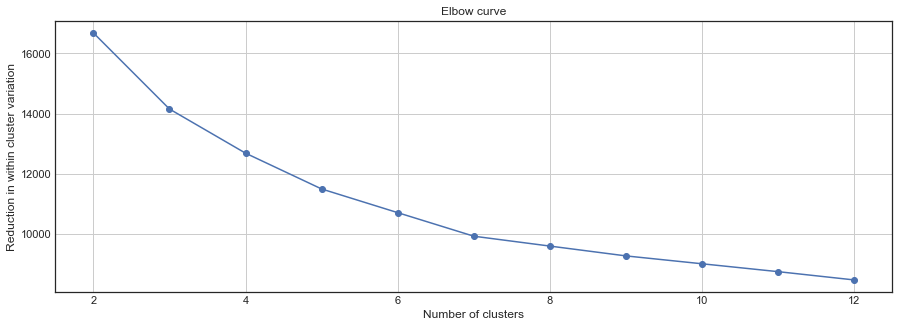

In [14]:
## initiate empty list with no data
within_cluster_variance = [] 

## build models for range of ks from 2 to 13
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 13), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve') 

The correct number of clusters seems to be at K = 6 or K = 7

#### K = 6

In [15]:
np.random.seed(0)
km4 = KMeans(n_clusters=6, n_init=20)
km4.fit(X)
pd.Series(km4.labels_).value_counts()

2    527
1    358
3    338
5    314
0     34
4     28
dtype: int64

In [16]:
km4.cluster_centers_
km4.labels_

array([2, 3, 2, ..., 5, 2, 5], dtype=int32)

In [17]:
km4.inertia_

10699.485435813987

In [18]:
X['cluster'] = km4.labels_
display(X.groupby('cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913,-0.022761
1,1.344000,-0.693390,1.136749,0.088105,-0.009025,-0.553275,-0.544598,0.754616,-0.849338,0.361047,0.205141,0.433548
2,-0.489985,0.663048,-0.811709,-0.232903,-0.076944,-0.415292,-0.418947,-0.096660,0.422977,-0.419524,-0.429757,-0.456414
3,-0.050717,0.081593,0.081435,0.014869,-0.016330,0.946625,1.243699,0.295306,-0.141974,-0.200161,-0.600653,-0.468993
4,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731,-0.345440
5,-0.654610,-0.406543,-0.171653,-0.228061,-0.390926,0.123734,-0.243842,-1.164709,0.601303,0.183829,1.250916,0.809826


In this analysis with K = 6, the cluster with higher wine quality have higher values associated with just the variable alcohol. The pH variable has the highest value, but not significantly higher than a cluster with lower quality of wine. The variables that cluster with low wine quality are volatile acidity, free sulfur dioxide, total sulfur, and density.

According to this analysis, if you want to make a good bottle of wine, alcohol the most important characteristic you should consider.

#### K = 7

In [19]:
np.random.seed(0)
km5 = KMeans(n_clusters=7, n_init=20)
km5.fit(X)
pd.Series(km5.labels_).value_counts()

0    533
1    358
4    332
2    163
5    151
6     34
3     28
dtype: int64

In [20]:
km5.cluster_centers_
km5.labels_

array([0, 4, 0, ..., 5, 0, 2], dtype=int32)

In [21]:
km5.inertia_

10092.591878766094

In [22]:
X['cluster'] = km5.labels_
display(X.groupby('cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.486968,0.666097,-0.814189,-0.217813,-0.072281,-0.407074,-0.411938,-0.079134,0.424942,-0.416229,-0.431149,-0.462468
1,1.344000,-0.693390,1.136749,0.088105,-0.009025,-0.553275,-0.544598,0.754616,-0.849338,0.361047,0.205141,0.433548
2,-0.251669,-1.011041,0.490223,-0.208383,-0.342282,-0.104790,-0.389953,-0.958378,0.063940,0.386363,1.161845,0.997991
3,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731,-0.345440
4,-0.047623,0.066189,0.101558,-0.004880,-0.022719,0.958043,1.262494,0.274254,-0.155338,-0.201487,-0.601505,-0.459500
5,-1.089573,0.245994,-0.886129,-0.249302,-0.443435,0.370418,-0.086119,-1.387437,1.181370,-0.034801,1.347065,0.606708
6,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913,-0.022761


In this analysis with K = 7, the cluster with higher wine quality have higher values associated with just the variable alcohol again. The variable that clusters with lower quality of wine is volatile acidity.

According to this analysis, if you want to make a good bottle of wine, alcohol the most important characteristic you should consider.

### 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

From the plot I found K = 6 or K = 7 to be the most optimal number of clusters. Although the K Means Cluster analysis shows that only the variable alcohol was associated with high quality wine, I went ahead and chose K = 6 for the Hierarchal Cluster Analysis. 

In [23]:
from sklearn.cluster import AgglomerativeClustering

np.random.seed(0)
ac = AgglomerativeClustering(n_clusters=6,  
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)    
print(labels)

[0 2 0 ... 2 0 0]


In [24]:
X['cluster'] = labels
display(X.groupby('cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.171315,-0.047872,0.048920,-0.111492,-0.079398,-0.417017,-0.452460,0.076359,-0.063469,-0.016317,0.022824,0.062223
1,0.027020,-0.115848,1.075490,-0.417745,5.421296,0.027900,0.498926,0.119246,-1.648630,3.664817,-0.874201,-0.271710
2,-0.354335,0.152127,-0.200631,-0.022978,-0.135150,0.792055,0.837478,-0.183558,0.273154,-0.137403,-0.000973,-0.133866
3,-0.152521,-0.184515,0.256022,5.666029,0.239815,1.354777,1.133713,1.319948,-0.260984,-0.193163,-0.576955,-0.116876
4,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
5,-0.611928,-1.369208,0.643873,0.243360,-0.823354,2.128879,3.001792,-2.543751,-1.255946,-1.019122,1.194434,1.013881


### Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

From this Hierarchal Cluster analysis, I found that the variables free sulfur dioxide, total sulfur dioxide, and alcohol cluster with higher values of wine quality. The variables that cluster with lower values of wine quality are citric acid, chlorides, density, and sulphates.

### If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

According to this analysis, if you want to make a good bottle of wine then free sulfur dioxide, total sulfur dioxide, and alcohol are the most important characteristics. In comparison to the K Means Clustering analysis, the Hierarchal Clustering analysis found that additional to alcohol, free sulfur dioxide and total sulfur dioxide are also important determinants of high wine quality. 

### 3. Use Principal Components Analysis to reduce the dimensions of your data.  

In [25]:
data.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [26]:
data.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [27]:
from sklearn.decomposition import PCA

X = pd.DataFrame(scale(data), index=data.index, columns=data.columns) ## scale
PCA().fit(X).components_.T

array([[ 0.48788336, -0.00417321, -0.16482854, -0.23109808, -0.07877938,
         0.0555313 , -0.30721496,  0.20052866, -0.17457815, -0.18295601,
        -0.25643792,  0.63857976],
       [-0.26512898,  0.33896786, -0.22708884,  0.04185824,  0.29937933,
         0.297287  , -0.62623369,  0.14612614, -0.06022334,  0.15510563,
         0.37716123,  0.00466168],
       [ 0.47333547, -0.1373581 ,  0.10022856, -0.0567358 , -0.12014871,
         0.13663328,  0.24414858,  0.29633271, -0.22097505,  0.34608556,
         0.62432783, -0.07003691],
       [ 0.13915442,  0.16773634,  0.24362014, -0.38303758,  0.70936319,
         0.10931059,  0.28385429, -0.17062614,  0.27818728, -0.05223656,
         0.08807787,  0.18364637],
       [ 0.19742679,  0.18978819, -0.02660785,  0.65477782,  0.26623723,
         0.33733656,  0.23054697, -0.18692254, -0.41993639, -0.00386273,
        -0.20861667,  0.05393118],
       [-0.04588071,  0.25948314,  0.61611132, -0.03371148, -0.15941286,
        -0.04264807, -

In [28]:
## loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=data.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
fixed acidity,0.487883,-0.004173,-0.164829,-0.231098,-0.078779,0.055531,-0.307215,0.200529,-0.174578,-0.182956,-0.256438,0.638580
volatile acidity,-0.265129,0.338968,-0.227089,0.041858,0.299379,0.297287,-0.626234,0.146126,-0.060223,0.155106,0.377161,0.004662
citric acid,0.473335,-0.137358,0.100229,-0.056736,-0.120149,0.136633,0.244149,0.296333,-0.220975,0.346086,0.624328,-0.070037
residual sugar,0.139154,0.167736,0.243620,-0.383038,0.709363,0.109311,0.283854,-0.170626,0.278187,-0.052237,0.088078,0.183646
chlorides,0.197427,0.189788,-0.026608,0.654778,0.266237,0.337337,0.230547,-0.186923,-0.419936,-0.003863,-0.208617,0.053931
free sulfur dioxide,-0.045881,0.259483,0.616111,-0.033711,-0.159413,-0.042648,-0.138260,-0.019356,-0.318000,-0.585389,0.237933,-0.051922
total sulfur dioxide,0.004067,0.363971,0.540732,-0.028460,-0.218453,0.115954,-0.110209,0.089897,0.121823,0.589188,-0.355047,0.069793
density,0.370301,0.330781,-0.168723,-0.200693,0.208793,-0.425667,-0.122546,0.079500,-0.249074,0.043538,-0.231453,-0.566645
pH,-0.432721,-0.065440,0.069771,-0.005466,0.257647,-0.480354,0.185692,0.314693,-0.461916,0.207610,-0.005599,0.341230
sulphates,0.254535,-0.109334,0.212913,0.560502,0.214835,-0.403743,-0.233402,0.275492,0.452689,-0.071919,0.097637,0.067793


In [29]:
## fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
1,-1.004185,2.071838,0.007759,0.466119,0.182454,0.657775,-1.376790,-0.176714,0.587342,-0.565736,0.048784,-0.139565
2,-0.915783,1.393434,-0.699286,0.345292,0.095210,0.254823,-0.720338,-0.088687,0.546495,-0.162065,-0.199140,-0.120391
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742,-0.132218,0.200660,-0.202816,-0.506212,0.241135,-0.107616,0.319764
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362


In [30]:
## standard deviation of the four principal components
np.sqrt(pca.explained_variance_)

array([1.76723537, 1.49775999, 1.29767979, 1.10262469, 0.98684987,
       0.81425235, 0.78657786, 0.71146969, 0.64153326, 0.57282161,
       0.42465446, 0.24403926])

In [31]:
## raw explained variance
pca.explained_variance_ 

array([3.12312087, 2.24328497, 1.68397283, 1.21578121, 0.97387267,
       0.66300688, 0.61870473, 0.50618912, 0.41156493, 0.3281246 ,
       0.18033141, 0.05955516])

In [32]:
## explained variance ratio
pca.explained_variance_ratio_ 

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563, 0.02732662,
       0.01501822, 0.00495983])

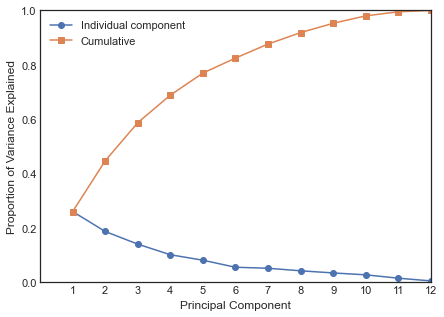

In [33]:
## plot
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0,12)
plt.ylim(0,1)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(loc=2);

## want orange cumulative amount (PCA explained variance ratio)
## blue line is the raw amount (Individual component)

### How much of the variation in your data is explained by the first two principal components.
The first two principal components explains about 45% of the variation in the data.

### How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

